# Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Libraries for Exploratory Data Analysis
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import sklearn.model_selection as model_selection
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import time

In [ ]:
df = pd.read_csv('/content/drive/My Drive/heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


# EDA

In [ ]:
df.shape

(297, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

there are no nulls

In [ ]:
# Mengetahui tipe variabel
df.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

In [ ]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
duplicated = df.duplicated().sum()
duplicated

0

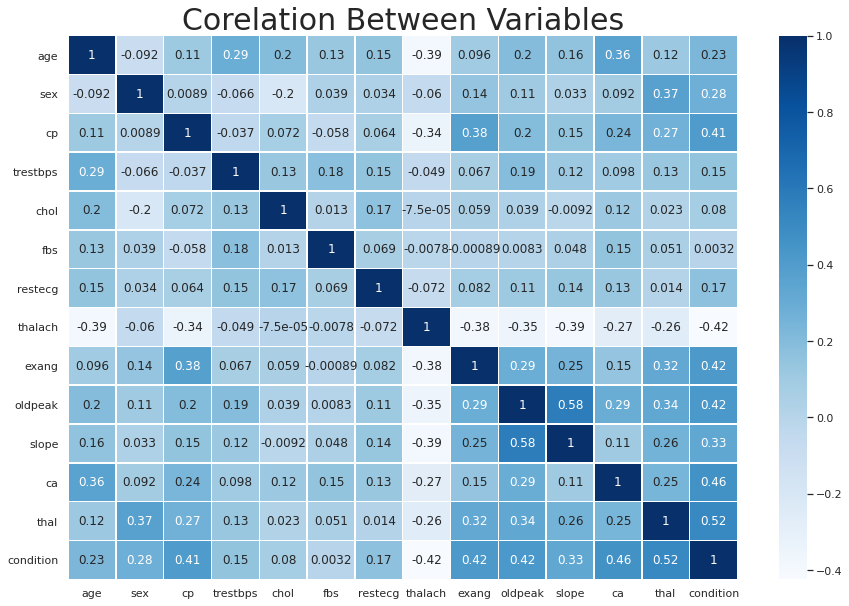

In [ ]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

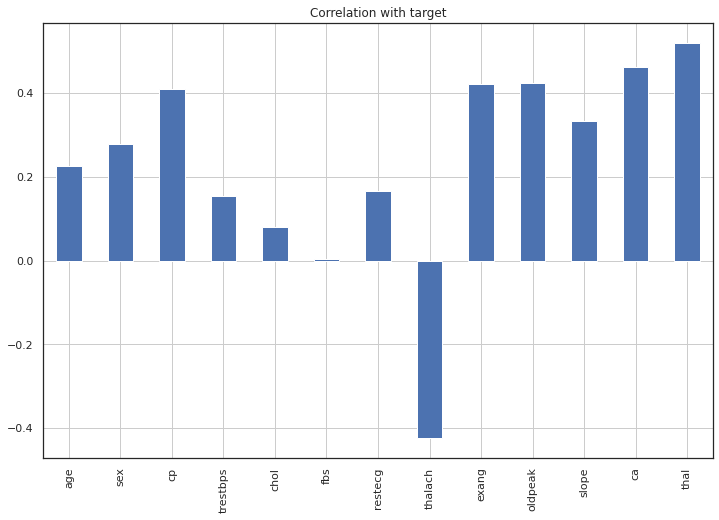

In [ ]:
df.drop('condition', axis=1).corrwith(df.condition).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

## Mengubah label untuk lebih mudah memahami visualisasi

In [ ]:
df_vis = df.copy()
df_vis['condition'] = df_vis.condition.replace({1: "Sakit", 0: "Sehat"})
df_vis['sex'] = df_vis.sex.replace({1: "Male", 0: "Female"})
df_vis['cp'] = df_vis.cp.replace({0: "typical", 
                          1: "atypical", 
                          2:"non-anginal",
                          3: "asymtomatic"})
df_vis['exang'] = df_vis.exang.replace({1: "Yes", 0: "No"})
df_vis['fbs'] = df_vis.fbs.replace({1: "Yes", 0: "No"})
df_vis['slope'] = df_vis.slope.replace({0: "upsloping", 
                          1: "flat", 
                          2:"downsloping"})
df_vis['restecg'] = df_vis.restecg.replace({0: "normal", 
                          1: "abnormal", 
                          2:"hipertrofi"})
df_vis['thal'] = df_vis.thal.replace({0: "normal", 1: "cacat tetap", 2:"cacat reversibel"})
df_vis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,Male,typical,160,234,Yes,hipertrofi,131,No,0.1,flat,1,normal,Sehat
1,69,Female,typical,140,239,No,normal,151,No,1.8,upsloping,2,normal,Sehat
2,66,Female,typical,150,226,No,normal,114,No,2.6,downsloping,0,normal,Sehat
3,65,Male,typical,138,282,Yes,hipertrofi,174,No,1.4,flat,1,normal,Sakit
4,64,Male,typical,110,211,No,hipertrofi,144,Yes,1.8,flat,0,normal,Sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,Male,asymtomatic,152,223,No,normal,181,No,0.0,upsloping,0,cacat reversibel,Sakit
293,39,Male,asymtomatic,118,219,No,normal,140,No,1.2,flat,0,cacat reversibel,Sakit
294,35,Male,asymtomatic,120,198,No,normal,130,Yes,1.6,flat,0,cacat reversibel,Sakit
295,35,Female,asymtomatic,138,183,No,normal,182,No,1.4,upsloping,0,normal,Sehat


## Cek Persebaran Data

Sehat    160
Sakit    137
Name: condition, dtype: int64


Text(0.5, 1.0, 'Heart Disease Classes')

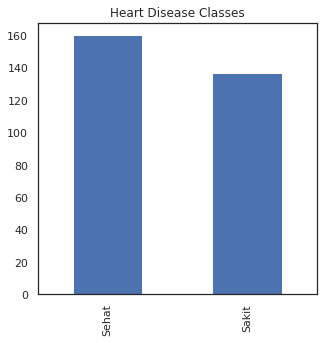

In [ ]:
print(df_vis.condition.value_counts())
df_vis['condition'].value_counts().plot(kind='bar', figsize=(5,5)).set_title('Heart Disease Classes')

Male      201
Female     96
Name: sex, dtype: int64


Text(0.5, 1.0, 'sex Distribution')

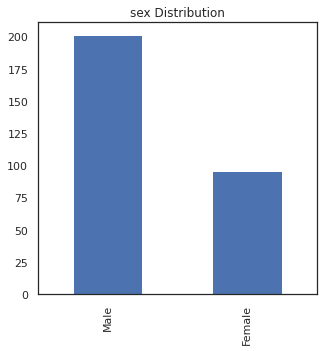

In [ ]:
print(df_vis.sex.value_counts())
df_vis['sex'].value_counts().plot(kind='bar', figsize=(5,5)).set_title('sex Distribution')

asymtomatic    142
non-anginal     83
atypical        49
typical         23
Name: cp, dtype: int64


Text(0.5, 1.0, 'Chest Pain Distribution')

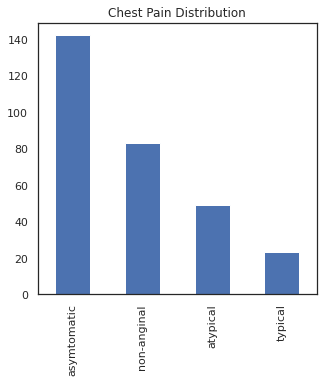

In [ ]:
print(df_vis.cp.value_counts())
df_vis['cp'].value_counts().plot(kind='bar', figsize=(5,5)).set_title('Chest Pain Distribution')

normal        147
hipertrofi    146
abnormal        4
Name: restecg, dtype: int64


Text(0.5, 1.0, 'Resting ECG Distribution')

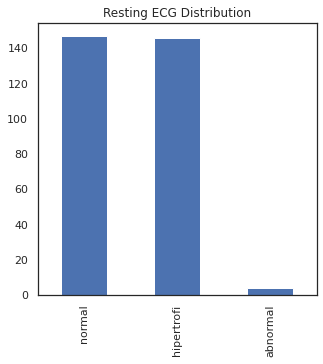

In [ ]:
print(df_vis.restecg.value_counts())
df_vis['restecg'].value_counts().plot(kind='bar', figsize=(5,5)).set_title('Resting ECG Distribution')

No     200
Yes     97
Name: exang, dtype: int64


Text(0.5, 1.0, 'Exercise Induced Angina Distribution')

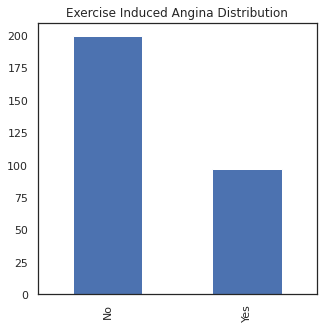

In [ ]:
print(df_vis.exang.value_counts())
df_vis['exang'].value_counts().plot(kind='bar', figsize=(5,5)).set_title('Exercise Induced Angina Distribution')

0    174
1     65
2     38
3     20
Name: ca, dtype: int64


Text(0.5, 1.0, 'Number of Major Vessel Distribution')

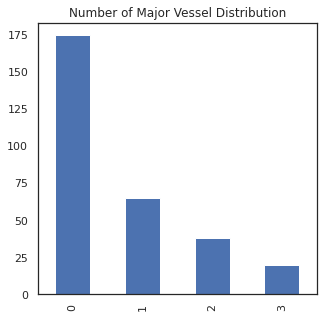

In [ ]:
print(df_vis.ca.value_counts())
df_vis['ca'].value_counts().plot(kind='bar', figsize=(5,5)).set_title('Number of Major Vessel Distribution')

normal              164
cacat reversibel    115
cacat tetap          18
Name: thal, dtype: int64


Text(0.5, 1.0, 'thal Distribution')

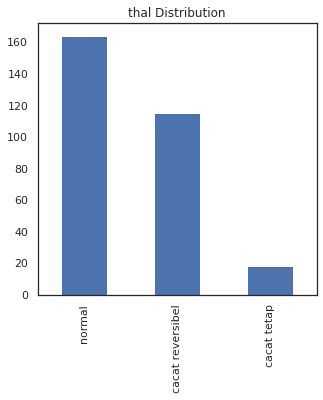

In [ ]:
print(df_vis.thal.value_counts())
df_vis['thal'].value_counts().plot(kind='bar', figsize=(5,5)).set_title('thal Distribution')

Text(0.5, 1.0, 'Age Distribution')

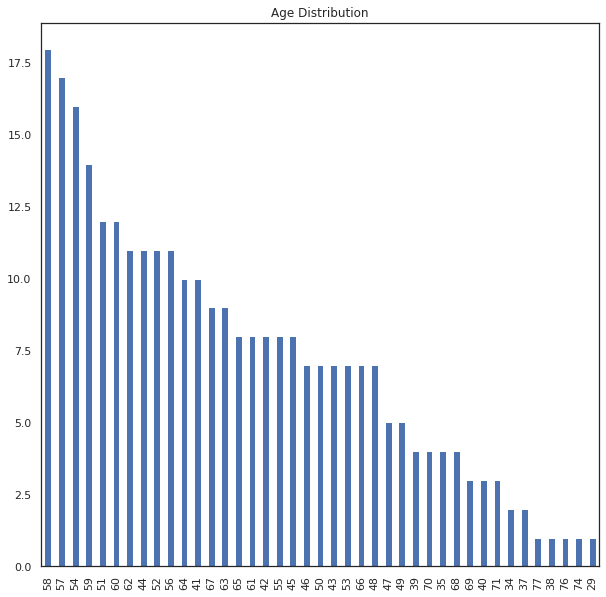

In [ ]:
# print(df_vis.age.value_counts())
df_vis['age'].value_counts().plot(kind='bar', figsize=[10,10]).set_title('Age Distribution')

## Visualisasi Data dengan Target

In [ ]:
#membagi fitur katergori dan numerik
categorical_val = []
continous_val = []
for column in df_vis.columns:
    print('==============================')
    print(f"{column} : {df_vis[column].unique()}")
    if len(df_vis[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
print(categorical_val)
print(continous_val)

age : [69 66 65 64 63 61 60 59 58 56 52 51 45 42 40 38 34 74 71 70 62 57 55 54
 50 49 48 46 44 41 35 29 76 68 67 53 47 43 39 37 77]
sex : ['Male' 'Female']
cp : ['typical' 'atypical' 'non-anginal' 'asymtomatic']
trestbps : [160 140 150 138 110 170 145 134 178 120 118 152 125 148 156 128 136 130
 124 154 135 132 108 192 101 105 112 126 122 180 115 146 155 102 172 100
  94 129 142 144 106 117 158 174 164 114 165 200 123 104]
chol : [234 239 226 282 211 227 233 240 270 288 273 204 283 193 186 298 213 264
 244 199 231 182 269 302 245 246 195 281 208 221 284 319 236 261 232 294
 250 262 342 309 325 201 205 271 266 229 197 160 308 263 219 220 295 203
 198 235 306 157 192 210 265 254 274 277 564 212 278 417 360 335 313 252
 243 185 318 178 218 230 224 340 168 126 256 258 214 304 267 196 222 175
 188 149 275 255 257 253 177 141 242 315 209 180 268 321 215 174 322 286
 299 237 223 228 225 248 303 407 330 187 164 394 260 307 166 207 206 293
 305 326 249 176 216 259 300 276 289 241 131 354 184 40

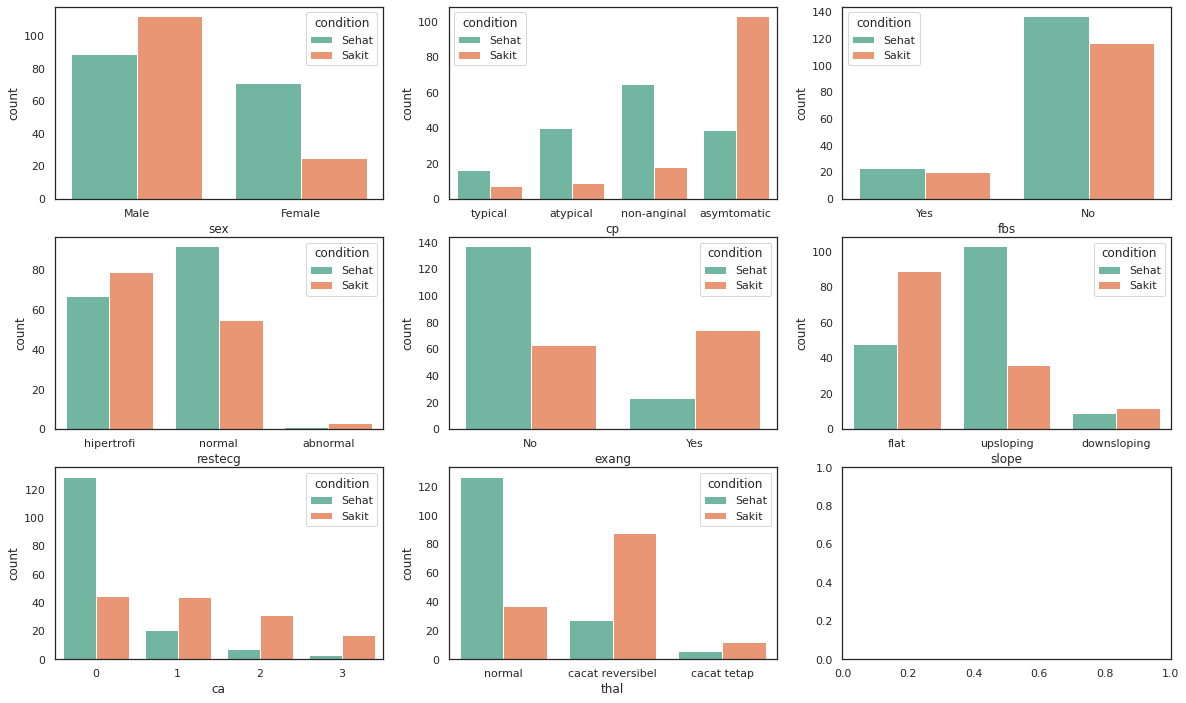

In [ ]:
# plotting categorical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,12))
for idx, feature in enumerate(categorical_val):
    ax = axes[int(idx/3), idx%3]
    if feature != 'condition':
        sns.countplot(x=feature, hue='condition', data=df_vis, ax=ax, palette='Set2')

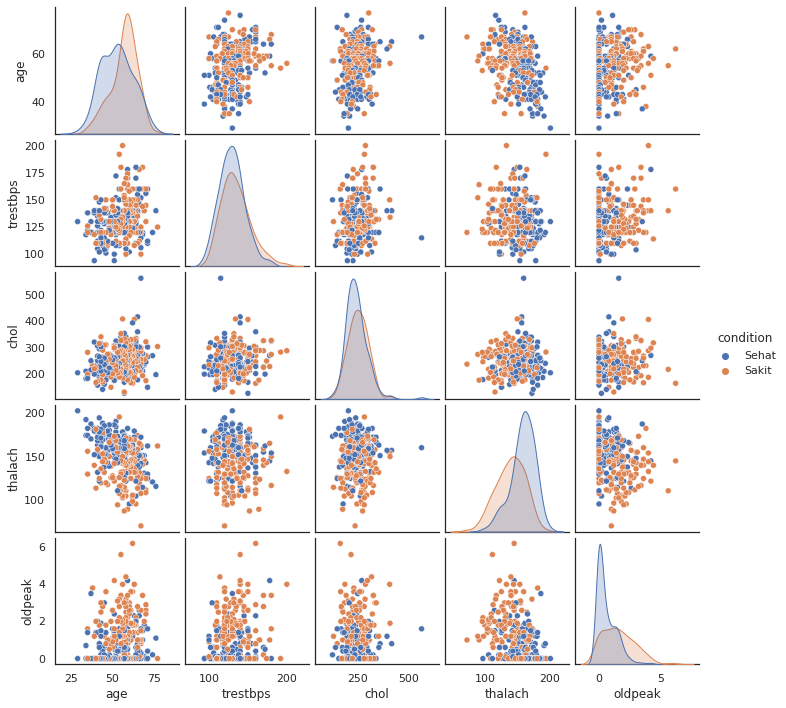

In [ ]:
#plot continuous variable
sns.pairplot(df_vis[continous_val + ['condition']], hue='condition', height=2)

## Cek Outliers

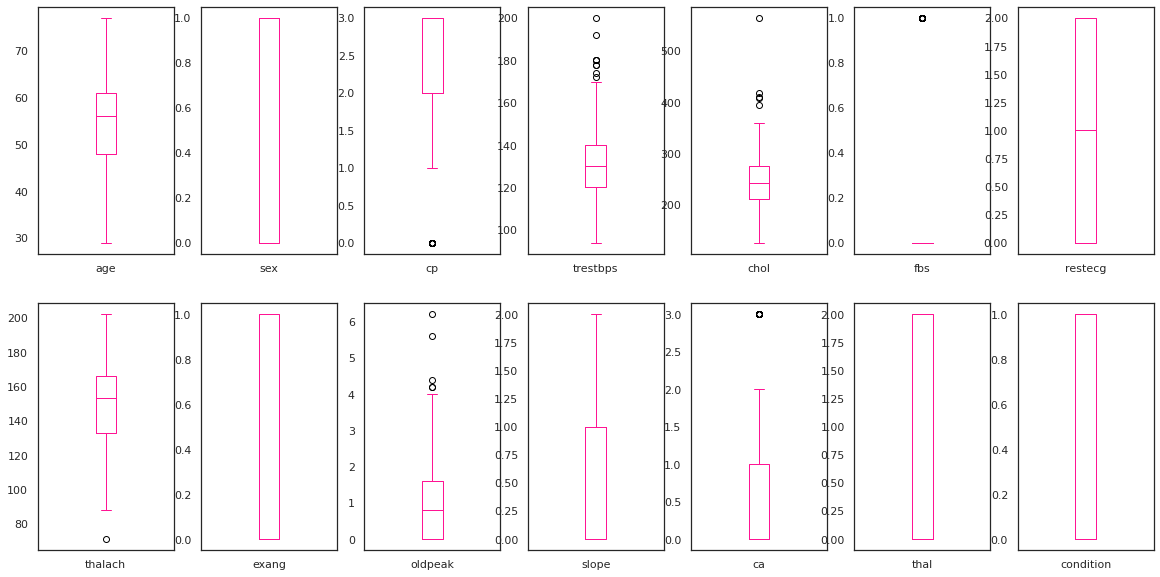

In [ ]:
# Cek Outliers

df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

In [ ]:
# variable yang memiliki outliers
continous_features = ['trestbps','chol','thalach','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [ ]:
#drop outier
#outliers(df[continous_features], drop=True)

# Preprocessing

## Data Splitting

In [ ]:
# y adalah kolom yang hanya target
y=df.iloc[:,-1]
y.head(2)

0    0
1    0
Name: condition, dtype: int64

In [ ]:
# X adalah kolom attribut tanpa kolom target
X=df.iloc[:,:-1]
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42,stratify=y) 

## Normalisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #tanpa target
X_test_scaled = scaler.transform(X_test)

# Skenario Uji Coba

## KNN

In [ ]:
acc_KNN = []
x_axis_KNN = range(5,30)
for i in x_axis_KNN:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)*100
    acc_KNN.append(accuracy)
    print ("Akurasi KNN dengan k = ",i," adalah: ", accuracy)

print ("Akurasi tertinggi KNN adalah: ", max(acc_KNN))

Akurasi KNN dengan k =  5  adalah:  85.90604026845638
Akurasi KNN dengan k =  6  adalah:  84.56375838926175
Akurasi KNN dengan k =  7  adalah:  84.56375838926175
Akurasi KNN dengan k =  8  adalah:  85.23489932885906
Akurasi KNN dengan k =  9  adalah:  86.57718120805369
Akurasi KNN dengan k =  10  adalah:  86.57718120805369
Akurasi KNN dengan k =  11  adalah:  86.57718120805369
Akurasi KNN dengan k =  12  adalah:  85.90604026845638
Akurasi KNN dengan k =  13  adalah:  87.24832214765101
Akurasi KNN dengan k =  14  adalah:  85.23489932885906
Akurasi KNN dengan k =  15  adalah:  87.24832214765101
Akurasi KNN dengan k =  16  adalah:  86.57718120805369
Akurasi KNN dengan k =  17  adalah:  87.24832214765101
Akurasi KNN dengan k =  18  adalah:  87.24832214765101
Akurasi KNN dengan k =  19  adalah:  87.91946308724832
Akurasi KNN dengan k =  20  adalah:  86.57718120805369
Akurasi KNN dengan k =  21  adalah:  87.24832214765101
Akurasi KNN dengan k =  22  adalah:  86.57718120805369
Akurasi KNN den

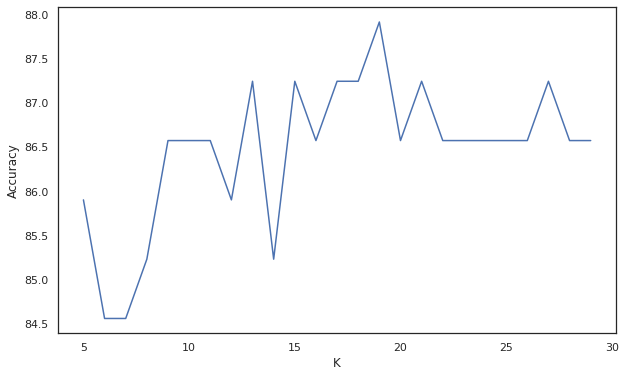

In [ ]:
plt.subplots(figsize = (10, 6))
plt.plot(x_axis_KNN, acc_KNN)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

## SVM

In [ ]:
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
acc_SVM = []
max_acc = 0
final_rows = []
x_axis_SVM = [0.1, 1, 10, 100, 1000]
k = ['poly', 'rbf', 'sigmoid']
for k in k:
    for i in x_axis_SVM:
        SVM = SVC(C= i, gamma='scale', kernel= k)
        SVM.fit(X_train_scaled, y_train)
        y_pred = SVM.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)*100
        if accuracy > max_acc:
            max_acc = accuracy
        acc_SVM.append(accuracy)
        print ("Akurasi SVM untuk kernel = ",k," c = ",i," adalah: ", accuracy)

print ("Akurasi tertinggi SVM : ", max(acc_SVM))

Akurasi SVM untuk kernel =  poly  c =  0.1  adalah:  71.14093959731544
Akurasi SVM untuk kernel =  poly  c =  1  adalah:  85.23489932885906
Akurasi SVM untuk kernel =  poly  c =  10  adalah:  77.18120805369128
Akurasi SVM untuk kernel =  poly  c =  100  adalah:  75.83892617449665
Akurasi SVM untuk kernel =  poly  c =  1000  adalah:  75.83892617449665
Akurasi SVM untuk kernel =  rbf  c =  0.1  adalah:  85.23489932885906
Akurasi SVM untuk kernel =  rbf  c =  1  adalah:  87.91946308724832
Akurasi SVM untuk kernel =  rbf  c =  10  adalah:  81.87919463087249
Akurasi SVM untuk kernel =  rbf  c =  100  adalah:  79.86577181208054
Akurasi SVM untuk kernel =  rbf  c =  1000  adalah:  79.86577181208054
Akurasi SVM untuk kernel =  sigmoid  c =  0.1  adalah:  87.91946308724832
Akurasi SVM untuk kernel =  sigmoid  c =  1  adalah:  87.24832214765101
Akurasi SVM untuk kernel =  sigmoid  c =  10  adalah:  82.5503355704698
Akurasi SVM untuk kernel =  sigmoid  c =  100  adalah:  80.53691275167785
Akurasi

## MLP

In [ ]:
import warnings
warnings.filterwarnings("ignore")
acc_MLP = []
i = 10
j = 10
k = 10
while i < 51:
  while j < 51:
    while k < 51:
      mlp = MLPClassifier(random_state=42, max_iter=300, hidden_layer_sizes=(i, j, k))
      mlp.fit(X_train_scaled, y_train)
      y_pred_mlp=mlp.predict(X_test_scaled)
      accuracy = accuracy_score(y_test, y_pred_mlp)*100
      acc_MLP.append(accuracy)
      print ("Akurasi MLP  l1 = ",i," l2 = ",j," l3 = ",k," is: ", accuracy)
      k+=10
    j+= 10
    k= 10
  i+= 10
  j = 10

print ("Akurasi tertinggi MLP: ", max(acc_MLP))

Akurasi MLP  l1 =  10  l2 =  10  l3 =  10  is:  85.23489932885906
Akurasi MLP  l1 =  10  l2 =  10  l3 =  20  is:  83.22147651006712
Akurasi MLP  l1 =  10  l2 =  10  l3 =  30  is:  83.89261744966443
Akurasi MLP  l1 =  10  l2 =  10  l3 =  40  is:  83.22147651006712
Akurasi MLP  l1 =  10  l2 =  10  l3 =  50  is:  81.20805369127517
Akurasi MLP  l1 =  10  l2 =  20  l3 =  10  is:  85.23489932885906
Akurasi MLP  l1 =  10  l2 =  20  l3 =  20  is:  83.89261744966443
Akurasi MLP  l1 =  10  l2 =  20  l3 =  30  is:  81.20805369127517
Akurasi MLP  l1 =  10  l2 =  20  l3 =  40  is:  79.86577181208054
Akurasi MLP  l1 =  10  l2 =  20  l3 =  50  is:  83.22147651006712
Akurasi MLP  l1 =  10  l2 =  30  l3 =  10  is:  81.20805369127517
Akurasi MLP  l1 =  10  l2 =  30  l3 =  20  is:  82.5503355704698
Akurasi MLP  l1 =  10  l2 =  30  l3 =  30  is:  83.89261744966443
Akurasi MLP  l1 =  10  l2 =  30  l3 =  40  is:  77.85234899328859
Akurasi MLP  l1 =  10  l2 =  30  l3 =  50  is:  82.5503355704698
Akurasi MLP 

## XGBoost

In [ ]:
acc_XGB  = []
x_axis_XGB  = range(1,50)
for i in x_axis_XGB :
    xgb  = XGBClassifier(n_estimators=i)
    xgb.fit(X_train_scaled, y_train)
    y_pred = xgb.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)*100
    acc_XGB.append(accuracy)
    print ("Akurasi XGBoost dengan n = ",i," adalah: ", accuracy)

print ("Akurasi tertinggi XGBoost: ", max(acc_XGB))

Akurasi XGBoost dengan n =  1  adalah:  77.18120805369128
Akurasi XGBoost dengan n =  2  adalah:  77.18120805369128
Akurasi XGBoost dengan n =  3  adalah:  77.18120805369128
Akurasi XGBoost dengan n =  4  adalah:  77.18120805369128
Akurasi XGBoost dengan n =  5  adalah:  76.51006711409396
Akurasi XGBoost dengan n =  6  adalah:  76.51006711409396
Akurasi XGBoost dengan n =  7  adalah:  76.51006711409396
Akurasi XGBoost dengan n =  8  adalah:  76.51006711409396
Akurasi XGBoost dengan n =  9  adalah:  75.83892617449665
Akurasi XGBoost dengan n =  10  adalah:  76.51006711409396
Akurasi XGBoost dengan n =  11  adalah:  77.18120805369128
Akurasi XGBoost dengan n =  12  adalah:  77.85234899328859
Akurasi XGBoost dengan n =  13  adalah:  77.18120805369128
Akurasi XGBoost dengan n =  14  adalah:  78.52348993288591
Akurasi XGBoost dengan n =  15  adalah:  77.85234899328859
Akurasi XGBoost dengan n =  16  adalah:  78.52348993288591
Akurasi XGBoost dengan n =  17  adalah:  79.86577181208054
Akuras

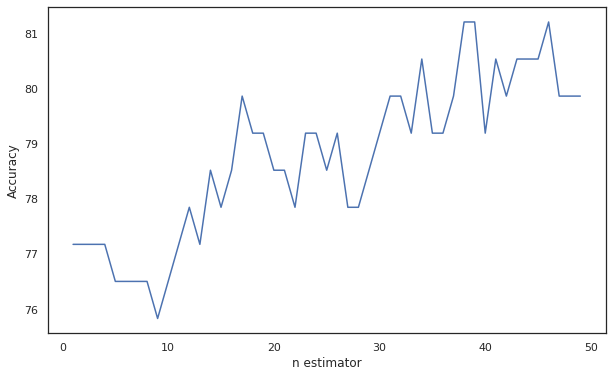

In [ ]:
plt.subplots(figsize = (10, 6))
plt.plot(x_axis_XGB, acc_XGB)
plt.xlabel('n estimator')
plt.ylabel('Accuracy')
plt.show()

## Random Forest

In [ ]:
acc_RF = []
max_acc = 0
final_rows = []
x_axis_RF = range(140,150)
for i in range(140,150):
    RF = RandomForestClassifier(n_estimators = i, random_state = 42, criterion='gini')
    RF.fit(X_train_scaled, y_train)
    y_pred = RF.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)*100
    if accuracy > max_acc:
        max_acc = accuracy
    acc_RF.append(accuracy)
    print ("Akurasi Random Forest dengan estimator = ",i," is: ", accuracy) 

print ("Akurasi tertinggi Random Forest: ", max(acc_RF),'dengan criterion gini')

Akurasi Random Forest dengan estimator =  140  is:  83.89261744966443
Akurasi Random Forest dengan estimator =  141  is:  84.56375838926175
Akurasi Random Forest dengan estimator =  142  is:  84.56375838926175
Akurasi Random Forest dengan estimator =  143  is:  84.56375838926175
Akurasi Random Forest dengan estimator =  144  is:  84.56375838926175
Akurasi Random Forest dengan estimator =  145  is:  85.23489932885906
Akurasi Random Forest dengan estimator =  146  is:  85.23489932885906
Akurasi Random Forest dengan estimator =  147  is:  85.23489932885906
Akurasi Random Forest dengan estimator =  148  is:  85.23489932885906
Akurasi Random Forest dengan estimator =  149  is:  85.23489932885906
Akurasi tertinggi Random Forest:  85.23489932885906 dengan criterion gini


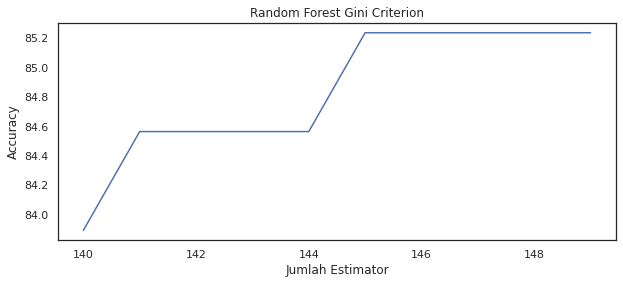

In [ ]:
plt.subplots(figsize = (10, 4))
plt.plot(x_axis_RF, acc_RF)
plt.xlabel('Jumlah Estimator')
plt.ylabel('Accuracy')
plt.title(label='Random Forest Gini Criterion')
plt.show()

In [ ]:
acc_RFE = []
max_acc = 0
final_rows = []
x_axis_RFE = range(140,150)
for i in range(140,150):
    RFE = RandomForestClassifier(n_estimators = i, random_state = 42, criterion='entropy')
    RFE.fit(X_train_scaled, y_train)
    y_pred = RFE.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)*100
    if accuracy > max_acc:
        max_acc = accuracy
    acc_RFE.append(accuracy)
    print ("Akurasi Random Forest dengan estimator = ",i," is: ", accuracy) 

print ("Akurasi tertinggi Random Forest: ", max(acc_RFE),'dengan criterion entropy')

Akurasi Random Forest dengan estimator =  140  is:  84.56375838926175
Akurasi Random Forest dengan estimator =  141  is:  84.56375838926175
Akurasi Random Forest dengan estimator =  142  is:  84.56375838926175
Akurasi Random Forest dengan estimator =  143  is:  84.56375838926175
Akurasi Random Forest dengan estimator =  144  is:  85.23489932885906
Akurasi Random Forest dengan estimator =  145  is:  84.56375838926175
Akurasi Random Forest dengan estimator =  146  is:  85.23489932885906
Akurasi Random Forest dengan estimator =  147  is:  84.56375838926175
Akurasi Random Forest dengan estimator =  148  is:  85.90604026845638
Akurasi Random Forest dengan estimator =  149  is:  85.90604026845638
Akurasi tertinggi Random Forest:  85.90604026845638 dengan criterion entropy


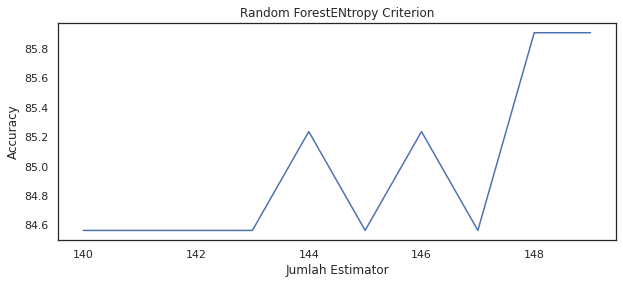

In [ ]:
plt.subplots(figsize = (10, 4))
plt.plot(x_axis_RFE, acc_RFE)
plt.title(label='Random ForestENtropy Criterion')
plt.xlabel('Jumlah Estimator')
plt.ylabel('Accuracy')
plt.show()

# Tabel hasil Evaluasi

In [ ]:
# function untuk melakukan perhitungan seluruh metric evaluasi -> https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
def get_metrics(true_labels, predicted_labels):
    acc=np.round(accuracy_score(true_labels, predicted_labels),4)
    prec=np.round(precision_score(true_labels, predicted_labels,average='weighted'),4)
    recall=np.round(recall_score(true_labels, predicted_labels,average='weighted'),4)
    f1=np.round(f1_score(true_labels, predicted_labels,average='weighted'),4)
    return [acc,prec,recall,f1]

In [ ]:
kolom=['Model','Acc','Precision','Recall','F1','Time']
HASIL_AKHIR=pd.DataFrame(columns=kolom)
HASIL_AKHIR= HASIL_AKHIR.sort_values(by='Acc',ascending=True)


# Model dengan Parameter Terbaik


## KNN

In [ ]:
# Training
start = time.time()
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
scores = cross_val_score(knn, X_train, y_train)
print("Cross-validation scores KNN: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores KNN:  [0.66666667 0.63333333 0.7        0.68965517 0.5862069 ]
Mean cross-validation score:  0.6551724137931034


In [ ]:
time_knn = time.time() - start
# predict model ke data test
y_pred_knn=knn.predict(X_test_scaled)
# evaluation score untuk model KNN
get_metrics(y_test,y_pred_knn)

[0.8792, 0.8851, 0.8792, 0.878]

## SVM

In [ ]:
start = time.time()
svm = SVC(kernel='rbf',C=1)
svm.fit(X_train_scaled, y_train)
scores = cross_val_score(svm, X_train, y_train)
print("Cross-validation scores svm: ", scores)
print("Mean cross-validation score: ", scores.mean())


Cross-validation scores svm:  [0.56666667 0.6        0.56666667 0.62068966 0.62068966]
Mean cross-validation score:  0.5949425287356321


In [ ]:
time_svm = time.time() - start
# predict model ke data test
y_pred_svm=svm.predict(X_test_scaled)
# evaluation score untuk model svm
get_metrics(y_test,y_pred_svm)

[0.8792, 0.8798, 0.8792, 0.8789]

## MLP

In [ ]:
start = time.time()
mlp = MLPClassifier(random_state=42, max_iter=300, hidden_layer_sizes=(50, 40,10))
mlp.fit(X_train_scaled, y_train)
scores = cross_val_score(mlp, X_train, y_train)
print("Cross-validation scores mlp: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores mlp:  [0.83333333 0.7        0.76666667 0.82758621 0.79310345]
Mean cross-validation score:  0.7841379310344827


In [ ]:
time_mlp = time.time() - start
# predict model ke data test
y_pred_mlp=mlp.predict(X_test_scaled)
# evaluation score untuk model mlp
get_metrics(y_test,y_pred_mlp)

[0.8859, 0.8859, 0.8859, 0.8858]

## Random Forest

In [ ]:
start =time.time()
rf = RandomForestClassifier(n_estimators=149, random_state=42,criterion='entropy')
rf.fit(X_train_scaled, y_train)
scores = cross_val_score(rf, X_train, y_train)
print("Cross-validation scores rf: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores rf:  [0.8        0.7        0.8        0.79310345 0.86206897]
Mean cross-validation score:  0.7910344827586206


In [ ]:
time_rf = time.time() - start
# predict model ke data test
y_pred_rf=rf.predict(X_test_scaled)
# evaluation score untuk model rf
get_metrics(y_test,y_pred_rf)

[0.8591, 0.859, 0.8591, 0.859]

## XGB

In [ ]:
# fit model XGBoost -> https://xgboost.readthedocs.io/en/latest/
start = time.time()
xgb = XGBClassifier(n_estimators=39)
xgb.fit(X_train_scaled, y_train)
scores = cross_val_score(xgb, X_train, y_train)
print("Cross-validation scores xgb: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores xgb:  [0.76666667 0.7        0.8        0.79310345 0.82758621]
Mean cross-validation score:  0.7774712643678161


In [ ]:
time_xgb = time.time() - start
# predict model ke data test
y_pred_xgb=xgb.predict(X_test_scaled)
# evaluation score untuk model XGBoost
get_metrics(y_test,y_pred_xgb)

[0.8121, 0.8152, 0.8121, 0.8123]

# Confusion Matrix

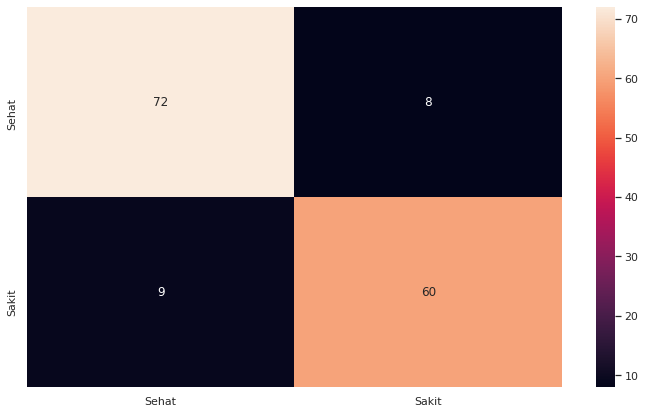

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        80
           1       0.88      0.87      0.88        69

    accuracy                           0.89       149
   macro avg       0.89      0.88      0.89       149
weighted avg       0.89      0.89      0.89       149



In [ ]:
# Confusion Matrix dari model mlp sebelumnya
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
labels=['Sehat','Sakit']
conf = confusion_matrix(y_test,y_pred_mlp)
cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)
plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()
print(classification_report(y_test,y_pred_mlp))

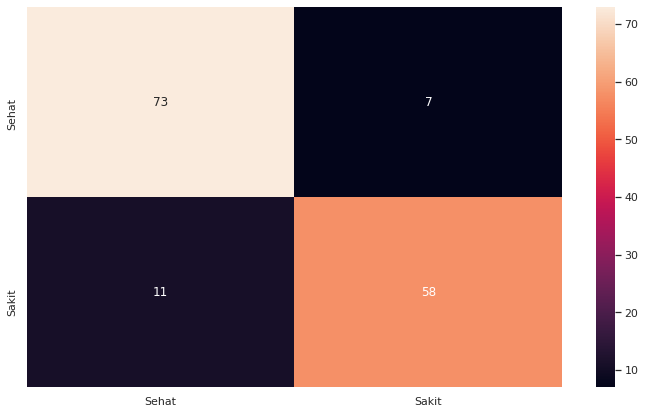

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        80
           1       0.89      0.84      0.87        69

    accuracy                           0.88       149
   macro avg       0.88      0.88      0.88       149
weighted avg       0.88      0.88      0.88       149



In [ ]:
# Confusion Matrix dari model svm sebelumnya
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
labels=['Sehat','Sakit']
conf = confusion_matrix(y_test,y_pred_svm)
cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)
plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()
print(classification_report(y_test,y_pred_svm))

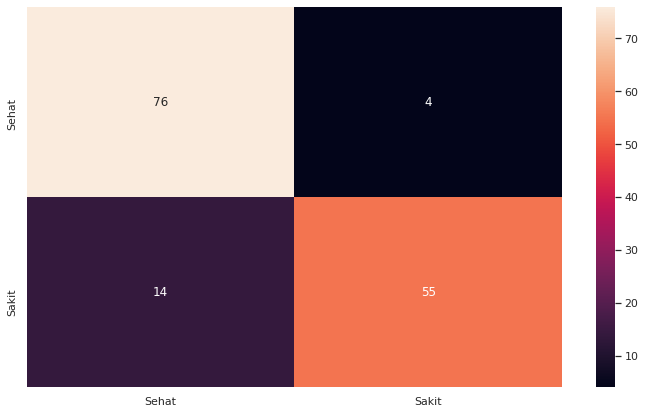

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        80
           1       0.93      0.80      0.86        69

    accuracy                           0.88       149
   macro avg       0.89      0.87      0.88       149
weighted avg       0.89      0.88      0.88       149



In [ ]:
# Confusion Matrix dari model knn sebelumnya
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
labels=['Sehat','Sakit']
conf = confusion_matrix(y_test,y_pred_knn)
cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)
plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()
print(classification_report(y_test,y_pred_knn))

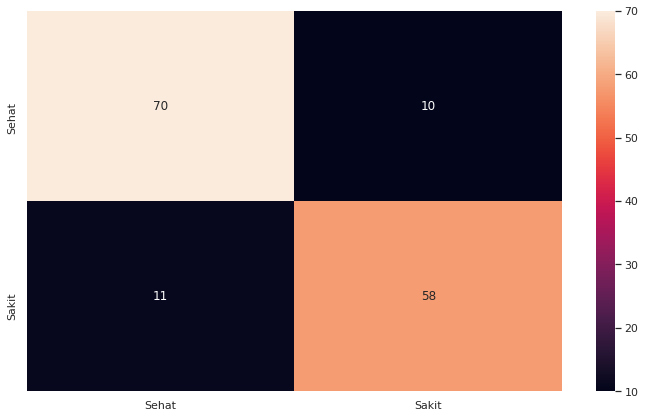

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        80
           1       0.85      0.84      0.85        69

    accuracy                           0.86       149
   macro avg       0.86      0.86      0.86       149
weighted avg       0.86      0.86      0.86       149



In [ ]:
# Confusion Matrix dari model rf sebelumnya
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
labels=['Sehat','Sakit']
conf = confusion_matrix(y_test,y_pred_rf)
cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)
plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()
print(classification_report(y_test,y_pred_rf))

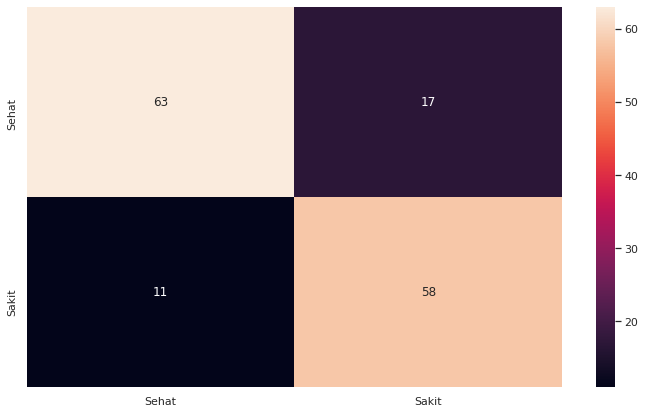

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        80
           1       0.77      0.84      0.81        69

    accuracy                           0.81       149
   macro avg       0.81      0.81      0.81       149
weighted avg       0.82      0.81      0.81       149



In [ ]:
# Confusion Matrix dari model xgb sebelumnya
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
labels=['Sehat','Sakit']
conf = confusion_matrix(y_test,y_pred_xgb)
cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)
plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()
print(classification_report(y_test,y_pred_xgb))

# Hasil Akhir

## Memasukkan Hasil ke metric dan Concat ke dataframe

In [ ]:
hasil=['knn']+get_metrics(y_test,y_pred_knn) + [time_knn]
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])
hasil=['svm']+get_metrics(y_test,y_pred_svm) + [time_svm]
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])
hasil=['mlp']+get_metrics(y_test,y_pred_mlp) + [time_mlp]
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])
hasil=['rf']+get_metrics(y_test,y_pred_rf) + [time_rf]
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])
hasil=['XGB']+get_metrics(y_test,y_pred_xgb) + [time_xgb]
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

## Menampilkan Hasil Perbandingan Score

In [ ]:
# menampilkan perbandingan score
HASIL_AKHIR.sort_values(by='Acc', ascending=False)

,Model,Acc,Precision,Recall,F1,Time
0,mlp,0.8859,0.8859,0.8859,0.8858,1.952154
0,knn,0.8792,0.8851,0.8792,0.8780,0.039242
0,svm,0.8792,0.8798,0.8792,0.8789,0.032493
0,rf,0.8591,0.8590,0.8591,0.8590,1.298043
0,XGB,0.8121,0.8152,0.8121,0.8123,0.089973
